In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
artists=pd.read_csv('../datasets/artists.csv')

G_geo_B_filtered_one = nx.read_gexf('gexf/G_geo_B_filtered_one_mod.gexf')

Node attributes (we need to use birth_year_order_1_to_N to create graphs, for the links we need movement too)

In [9]:
set([k for n in G_geo_B_filtered_one.nodes for k in G_geo_B_filtered_one.nodes[n].keys()])

{'birth_year',
 'birth_year_order_1_to_N',
 'first_year',
 'label',
 'last_year',
 'movement'}

In [13]:
G_geo_B_filtered_one.nodes['Ad Reinhardt']

{'birth_year': 1913,
 'first_year': 1937,
 'last_year': 1966,
 'birth_year_order_1_to_N': 466,
 'movement': 'Abstract Expressionism',
 'label': 'Ad Reinhardt'}

In [14]:
#Last number:

np.max([int(G_geo_B_filtered_one.nodes[n]['birth_year_order_1_to_N']) for n in G_geo_B_filtered_one.nodes])

512

All nodes have a birth year, birth year order (1,2,3, ... , last), and movement

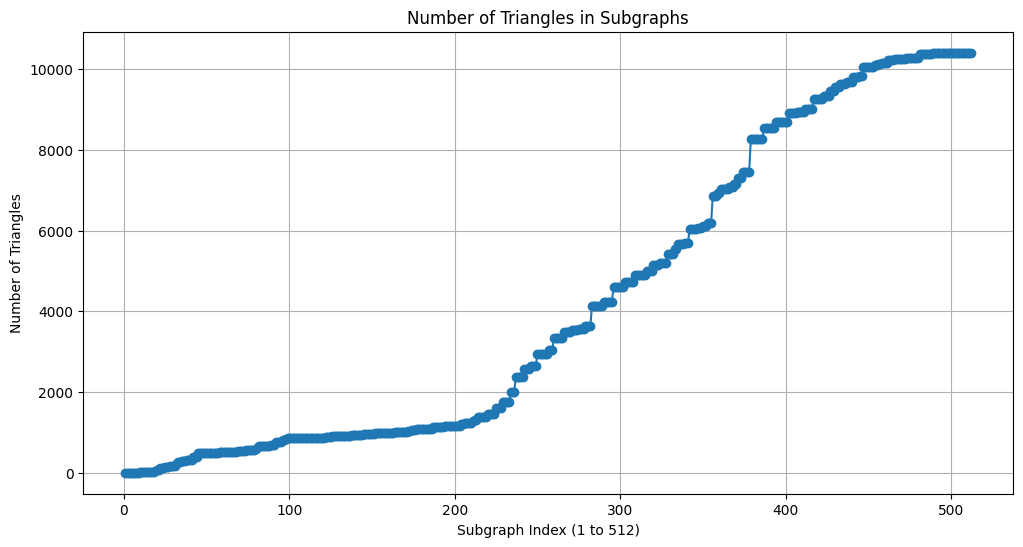

In [15]:
#Triangle closure

# Initializing a list to store the number of triangles for each graph
closed_triangle_counts = []
open_triangle_counts = [] # 3 nodes with 2 edges between them

# Iterating through the nodes to create subgraphs and count triangles
for i in range(1, 513):
    # Creating a subgraph with nodes having 'birth_year_order_1_to_N' less or equal to i
    subgraph_nodes = [node for node, attrs in G_geo_B_filtered_one.nodes(data=True) if attrs['birth_year_order_1_to_N'] <= i]
    subgraph = G_geo_B_filtered_one.subgraph(subgraph_nodes)

    # Counting the number of triangles in the subgraph
    closed_triangles = sum(nx.triangles(subgraph).values()) // 3  # Each triangle is counted three times
    closed_triangle_counts.append(closed_triangles)
    # Counting the number of open triangles in the subgraph: 3 nodes with 2 edges between them
    #TODO
    

# Visualizing the number of triangles for each subgraph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 513), closed_triangle_counts, marker='o')
plt.title('Number of Triangles in Subgraphs')
plt.xlabel('Subgraph Index (1 to 512)')
plt.ylabel('Number of Triangles')
plt.grid(True)
plt.show()
